<center><h1>Mineria de Datos Jz</header1></center>

Presentado por: Junior Zambrano, Jefferson Guaman, Jorge Pineda - Grupo 3 <br>
Lider: Junior Zambrano  <br>
Fecha: 16/08/2022

# Importación de librerias necesarias

In [1]:
'''Para esta actividad se importarán las siguientes librería'''
import pandas as pd
import numpy as np
from seaborn import heatmap
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

## Cargar el Dataset

In [2]:
'''Cargar Dataset'''
data = pd.read_csv('data.csv')

In [3]:
'''Mostrar dataset'''
data.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## Descripción de la fuente del Dataset

El conjunto de datos contiene información de partidos de ball by ball de los encuentros en EEUU. Los partdos jugados corresponde al enfrentamiento entre los equipos de la IPL de la temporada 1 a la 10. Los datos reales estan distribuidos a los juegos desde el 2008 al 2017.

General
https://cricsheet.org/downloads/

Especifico:
https://www.kaggle.com/datasets/f08f07c22b2fa4a0dce79ca8345835bd11ea2f5660d50c599f567b2446ab891a

## Explique el problema a resolver. 


Dado a los datos basados en el deporte de  ball by ball donde se detallan tiros, equipos, puntajes por tiro en cada juego. Se define seleccionar la varibale objetivo como el total de los puntos por cada tiro para determina la predicción de puntuación de la primera entrada de IPL mediante aprendizaje automatizado. Este fin ayudara a los equipos locales a definir su estrategia basados en los datos relevantes como la carrera, wickets y los bolos.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

In [4]:
'''Número de instancias en total.'''
data.shape

(76014, 15)

In [5]:
'''Número de atributos de entrada, su significado y tipo.'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [15]:
'''Estadísticas de la variable objetivo.'''
y.describe()

count    40108.000000
mean       161.947517
std         29.831496
min         67.000000
25%        142.000000
50%        163.000000
75%        183.000000
max        246.000000
Name: total, dtype: float64

In [16]:
'''Estadísticas los atributos en relación con la variable objetivo.'''
X.describe()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5
count,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000
mean,3.324299,3.260123,94.972699,3.042186,12.313459,38.887903,1.314027
std,2.217244,2.107865,40.966837,1.906814,4.323001,11.503810,1.062650
min,0.000000,0.000000,13.000000,0.000000,5.000000,10.000000,0.000000
25%,1.000000,1.000000,62.000000,2.000000,8.500000,31.000000,1.000000
50%,3.000000,3.000000,90.000000,3.000000,12.300000,38.000000,1.000000
75%,5.000000,5.000000,124.000000,4.000000,16.200000,46.000000,2.000000
max,7.000000,7.000000,246.000000,10.000000,19.600000,94.000000,7.000000


<AxesSubplot:>

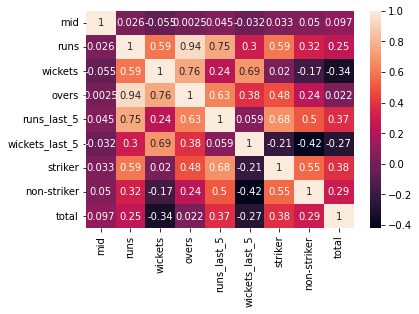

In [8]:
from seaborn import heatmap
heatmap(data=data.corr(), annot=True)

El conjunto de datos presenta un total de 76014 registros y un total de 15 características. Contiene diferentes tipos de datos entre int con un total de 8, object un total de 6 y float un total de 1. Dentro de las columnas del conjunto de datos tenemos mid que representa el ID, tenemos date que representa la fecha en la que se jugó dicho partido, tenemos venue que es el estadio donde se jugó, tenemos el quipo de bateo, también bowlingteam que es el nombre del equipo de bolos, batsman que es el bateador que enfrentó esa bola, bowler el jugador de bolos que lanzó esa bola, runs que son las carreras anotadas por el equipo, wickets que es el Número de wickets caídos del equipo, overs representa el número de Overs lanzados, runslast5 son las carreras anotadas en los 5 overs anteriores, wicketslast5 es el número de wickets que cayeron en los 5 overs anteriores, striker representa el máximo de carreras anotadas por el delantero, non-striker es el mínimo de carreras anotadas por el delantero, y por último tenemos el total que representan el total de carreras anotadas por el equipo de bateo. 

Dentro del conjunto de datos definimos nuestra variable objeto que va hacer la columna total y encontramos las estadísticas, estas presentan distintos rangos de valores, media, máx., mín., desviaciones estándar, etc. Es decir, muestran distintas magnitudes o escalas de la variable objetivo. Tenemos una media de 160.901452 y una desviación estándar de 29.246231, con un mínimo 67.000000 y quantiles del 25% 142.000000, 50% 162.000000 y 75% 181.000000 por ultimo un máximo 263.000000.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [9]:
'''Datos inreevantes para el modelado'''
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
'''Eliminar todas las columanas antes definidas'''
data = data.drop(irrelevant, axis=1) 

'''Datos relevantes listos para el modelado'''
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']
'''Comprobar los datos de los parametros'''
data = data[(data['batting_team'].isin(const_teams)) & (data['bowling_team'].isin(const_teams))]

In [10]:
'''Eliminar nulos'''
data = data.dropna()

In [11]:
'''Eliminar los primeros 5 overs de cada partido'''
data = data[data['overs'] >= 5.0]

In [12]:
'''Convertir nombres de los equipos en datos numericos'''
le = LabelEncoder()
'''Elección de columnas'''
for col in ['batting_team', 'bowling_team']:
  data[col] = le.fit_transform(data[col])

In [13]:
'''Ver transformación'''
data

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...
75884,3,4,106,9,18.1,29,4,107
75885,3,4,107,9,18.2,29,4,107
75886,3,4,107,9,18.3,28,4,107
75887,3,4,107,9,18.4,24,4,107


In [14]:
'''Definición de variable objetivo y etiquetas '''
X = data.drop(['total'], axis=1)
y = data['total']

## Modelamiento

In [45]:
'''Códo del modelo'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 3)
'''Modelo a ejecutar'''
lr = LinearRegression()

In [47]:
'''Ajuste la línea de Rl'''
lr.fit(X_train, y_train)
'''Entrenamiento'''
yr_hat = lr.predict(X_test)

In [48]:
'''Test'''
lr_score = lr.score(X_test, y_test)  
print("Accuracy: ", lr_score)

Accuracy:  0.9245949551230012


## Evaluación del Modelo

Como se pudo observar en la ejecucion del modelo de regresion lineal,se preproceso el dataset para seleccionar las 15 caracteristicas y eliminar las que no eran necesarias como tambien se transformo las columnas con string para poder tener valores numericos para ser entrenado, tambien se obtuvo que el modelo dio un rendimiento optimo con el dataset de ball by ball, con un accuracy de 92 % del modelo de entrenamiento, consiguiendo la prediccion de la puntuacion de la primera entrada.

# Interpretación de Resultados

Se realizó la implementación de regresion lineal con el objetivo de hacer un  análisis deportivo, se busca predecir el puntaje de la primera entrada en función de los datos anteriores como la carrera, wickets y los bolos. El ejercicio resultante permitió mostrar cual es la exactitud de un modelo que fue previamente entrenado con los datos característicos de los partidos de ball by ball, dando como resultado una exactitud del modelo con un 92%.

Como se pudo notar el valor del accuracy o exactitud de la matriz es del 0.92 que representa el 92\%, del total de casos solo se ha equivocado en un 8\% no más, esto nos indica que tiene una alta proporción de predicciones que fueron clasificadas correctamente en el modelo. Además como se obtuvo un valor alto, esto nos indica que los valores no están dispersos. Por consiguiente, como el valor es alto se puede decir que la matriz es lo suficientemente exacta.